# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from torch.autograd import Variable
import torch
import torchvision

## Carregamento dos dados do MNIST

In [63]:
! git clone https://github.com/vcasadei/MNIST.git

fatal: destination path 'MNIST' already exists and is not an empty directory.


In [100]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [101]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(-0.5, 232.5, 87.5, -0.5)

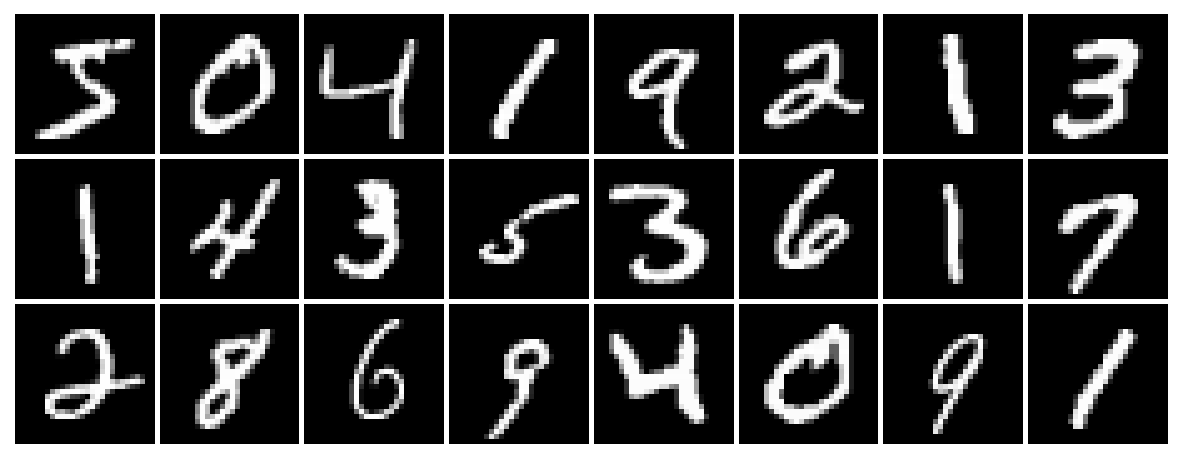

In [102]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


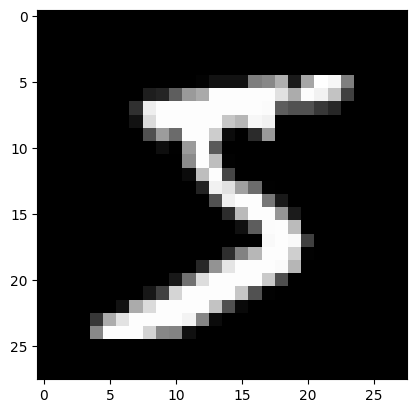

In [103]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy().reshape(28,28), cmap='gray')
print('class:', target)

## Modelo

In [104]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [105]:
## TODO A realizar

model(x_train[:5].view(-1, 28*28))

tensor([[-0.0332,  0.2500, -0.2058, -0.0827,  0.4798, -0.0182,  0.1223,  0.0223,
          0.3082,  0.0900],
        [-0.1763,  0.1515, -0.2565,  0.3229,  0.0379,  0.0942, -0.0473,  0.0470,
         -0.1194,  0.0976],
        [ 0.0503,  0.1674,  0.0266, -0.0679,  0.2039,  0.0301,  0.1169, -0.0073,
          0.0648,  0.3631],
        [-0.2662,  0.1612, -0.3572,  0.0910,  0.0978,  0.0715,  0.0875,  0.0703,
          0.3092,  0.0151],
        [-0.2680,  0.3252, -0.1916,  0.0378,  0.1537,  0.1439,  0.0468,  0.2226,
          0.2464,  0.0021]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [106]:
epochs = 25
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [ ]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

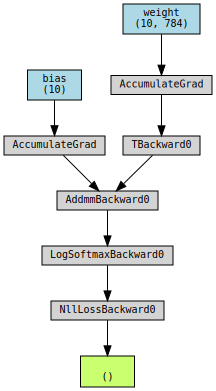

In [107]:
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
from torchviz import make_dot, make_dot_from_trace
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [72]:
from IPython import display
import numpy
a = 5
losses = []
zs = []
fig = plt.figure(figsize=(18, 6))

try:
    for i in range(epochs):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # Predict da rede
        outputs = model(inputs)
        zs.append(outputs[1].detach().numpy())

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data)
        _, predicts = torch.max(outputs, 1)

        y_pred = predicts.data
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()

        weights = model.state_dict()['weight']
        print('weights:', weights.shape)

except KeyboardInterrupt:
    pass

weights: torch.Size([10, 784])
weights: torch.Size([10, 784])
weights: torch.Size([10, 784])
weights: torch.Size([10, 784])
weights: torch.Size([10, 784])


<Figure size 1800x600 with 0 Axes>

In [73]:
model.weight

Parameter containing:
tensor([[ 0.0143,  0.0082, -0.0096,  ...,  0.0064, -0.0004,  0.0098],
        [ 0.0002, -0.0103,  0.0275,  ...,  0.0108,  0.0193,  0.0318],
        [-0.0011, -0.0068, -0.0240,  ...,  0.0127,  0.0047,  0.0078],
        ...,
        [ 0.0083,  0.0201, -0.0025,  ..., -0.0141,  0.0253, -0.0043],
        [ 0.0344, -0.0045, -0.0028,  ...,  0.0226,  0.0095,  0.0082],
        [-0.0223, -0.0103, -0.0299,  ..., -0.0077,  0.0143, -0.0081]],
       requires_grad=True)

In [74]:
print('Final loss:', loss.data)

Final loss: tensor(1.1001)


### Visualizando gráfico de perda durante o treinamento

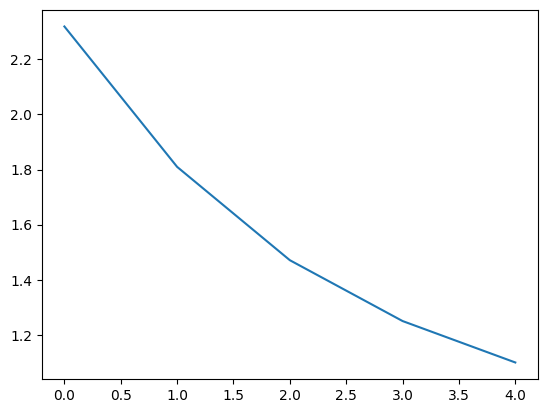

In [75]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [76]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.814


### Matriz de confusão com dados de treinamento e teste

In [77]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,94,0,3,2,0,6,3,2,0,3
1,0,109,12,1,3,2,3,10,5,2
2,1,0,70,0,1,2,1,1,3,0
3,0,1,2,78,0,15,0,0,7,1
4,0,0,2,0,88,4,2,3,0,7
5,0,1,0,3,0,52,0,0,2,1
6,2,1,2,2,2,3,84,0,2,0
7,0,0,4,3,0,1,0,96,0,5
8,0,4,3,3,1,4,1,0,64,2


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


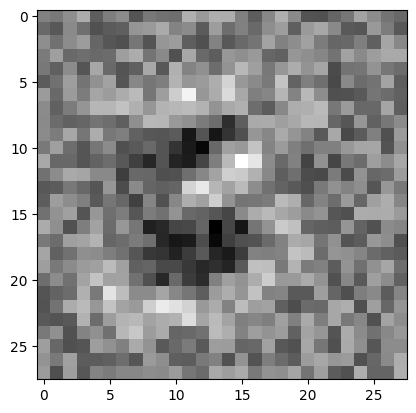

In [78]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

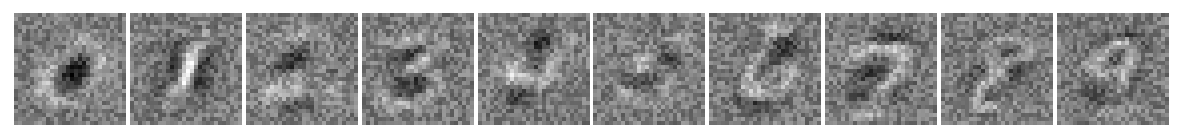

In [79]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

In [89]:
#R1 e R2

losses = []
zs = []
contador = 0

try:
    for i in range(epochs):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # Predict da rede
        outputs = model(inputs)
        zs.append(outputs[1].detach().numpy())

        contador = contador + 1


        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data)
        _, predicts = torch.max(outputs, 1)

        y_pred = predicts.data
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()

        print('Época: ',contador,';Perda: ',loss,';Acurácia: ',accuracy)

except KeyboardInterrupt:
    pass

Época:  1 ;Perda:  tensor(2.2952, grad_fn=<NllLossBackward0>) ;Acurácia:  0.076
Época:  2 ;Perda:  tensor(1.7987, grad_fn=<NllLossBackward0>) ;Acurácia:  0.591
Época:  3 ;Perda:  tensor(1.4697, grad_fn=<NllLossBackward0>) ;Acurácia:  0.735
Época:  4 ;Perda:  tensor(1.2510, grad_fn=<NllLossBackward0>) ;Acurácia:  0.78
Época:  5 ;Perda:  tensor(1.1014, grad_fn=<NllLossBackward0>) ;Acurácia:  0.798
Época:  6 ;Perda:  tensor(0.9914, grad_fn=<NllLossBackward0>) ;Acurácia:  0.815
Época:  7 ;Perda:  tensor(0.9102, grad_fn=<NllLossBackward0>) ;Acurácia:  0.823
Época:  8 ;Perda:  tensor(0.8476, grad_fn=<NllLossBackward0>) ;Acurácia:  0.829
Época:  9 ;Perda:  tensor(0.7975, grad_fn=<NllLossBackward0>) ;Acurácia:  0.835
Época:  10 ;Perda:  tensor(0.7562, grad_fn=<NllLossBackward0>) ;Acurácia:  0.843
Época:  11 ;Perda:  tensor(0.7214, grad_fn=<NllLossBackward0>) ;Acurácia:  0.851
Época:  12 ;Perda:  tensor(0.6916, grad_fn=<NllLossBackward0>) ;Acurácia:  0.859
Época:  13 ;Perda:  tensor(0.6656, gra

- 2) Insira um código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  1 ;Perda:  tensor(2.3225, grad_fn=<NllLossBackward0>) ;Acurácia:  0.085


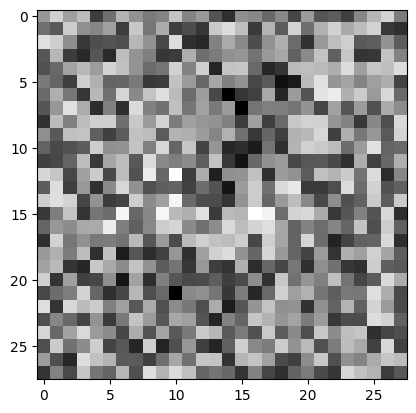

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  2 ;Perda:  tensor(1.8190, grad_fn=<NllLossBackward0>) ;Acurácia:  0.536


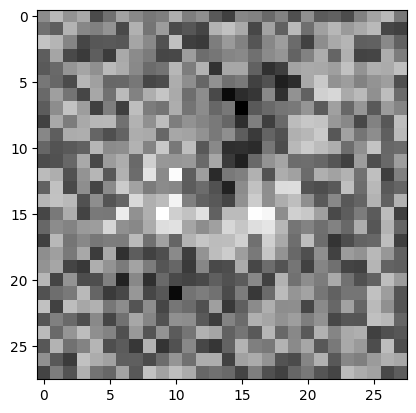

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  3 ;Perda:  tensor(1.4844, grad_fn=<NllLossBackward0>) ;Acurácia:  0.75


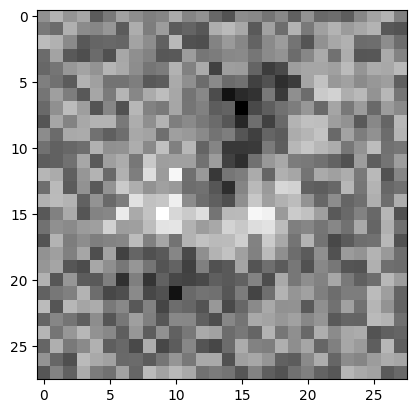

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  4 ;Perda:  tensor(1.2578, grad_fn=<NllLossBackward0>) ;Acurácia:  0.766


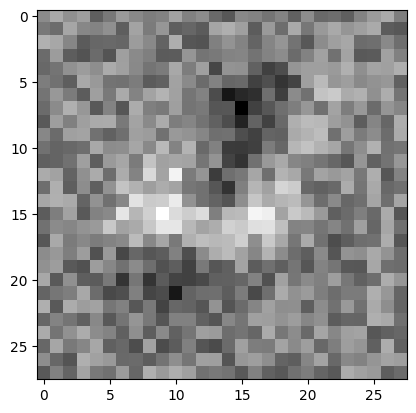

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  5 ;Perda:  tensor(1.1053, grad_fn=<NllLossBackward0>) ;Acurácia:  0.808


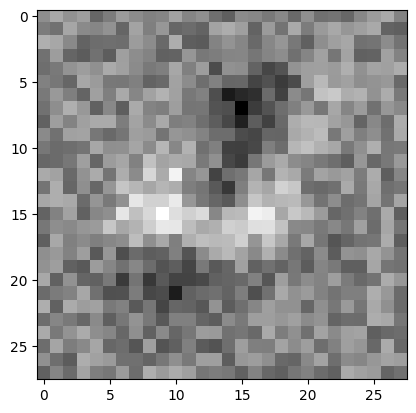

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  6 ;Perda:  tensor(0.9933, grad_fn=<NllLossBackward0>) ;Acurácia:  0.817


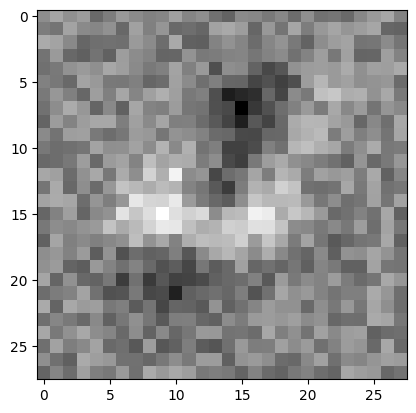

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  7 ;Perda:  tensor(0.9112, grad_fn=<NllLossBackward0>) ;Acurácia:  0.824


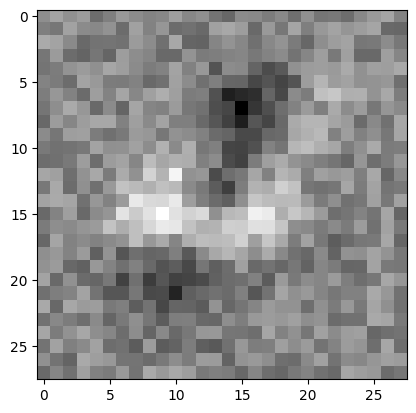

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  8 ;Perda:  tensor(0.8480, grad_fn=<NllLossBackward0>) ;Acurácia:  0.832


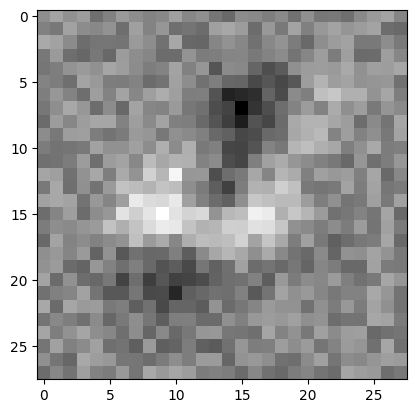

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  9 ;Perda:  tensor(0.7974, grad_fn=<NllLossBackward0>) ;Acurácia:  0.838


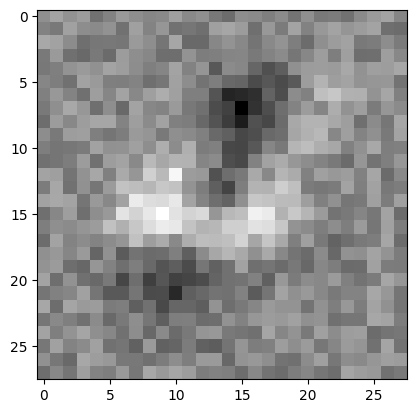

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  10 ;Perda:  tensor(0.7559, grad_fn=<NllLossBackward0>) ;Acurácia:  0.844


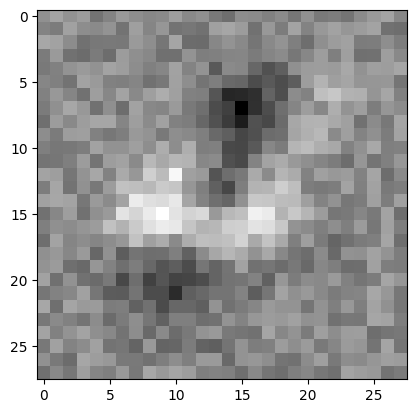

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  11 ;Perda:  tensor(0.7208, grad_fn=<NllLossBackward0>) ;Acurácia:  0.85


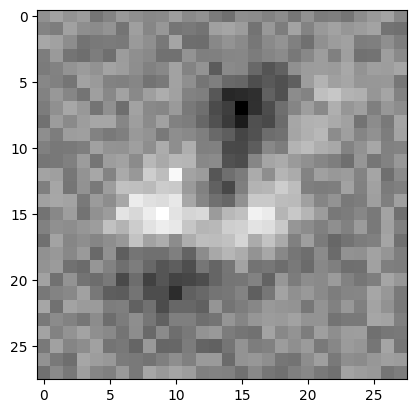

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  12 ;Perda:  tensor(0.6908, grad_fn=<NllLossBackward0>) ;Acurácia:  0.856


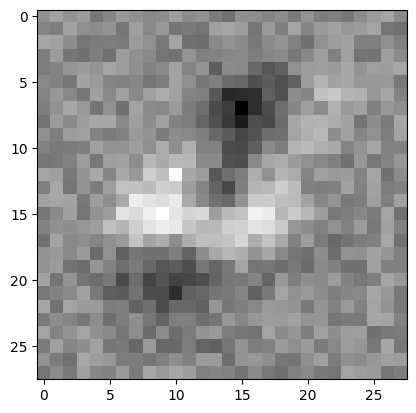

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  13 ;Perda:  tensor(0.6647, grad_fn=<NllLossBackward0>) ;Acurácia:  0.86


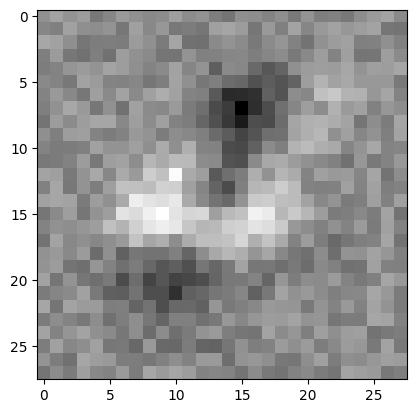

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  14 ;Perda:  tensor(0.6418, grad_fn=<NllLossBackward0>) ;Acurácia:  0.864


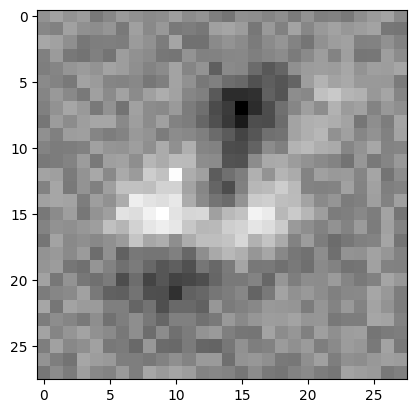

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  15 ;Perda:  tensor(0.6214, grad_fn=<NllLossBackward0>) ;Acurácia:  0.868


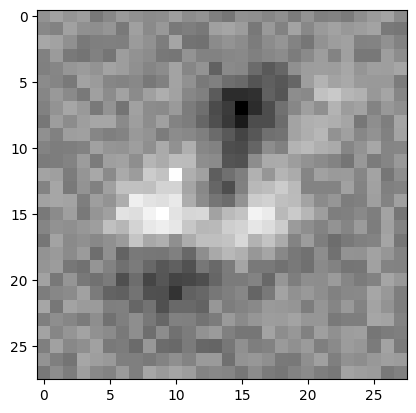

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  16 ;Perda:  tensor(0.6031, grad_fn=<NllLossBackward0>) ;Acurácia:  0.872


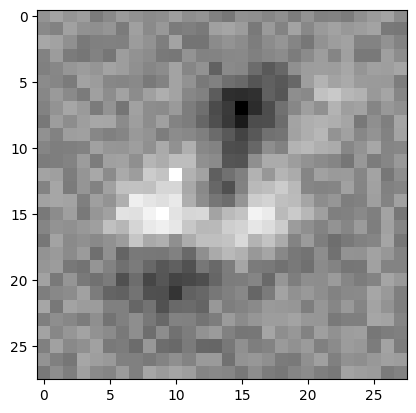

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  17 ;Perda:  tensor(0.5866, grad_fn=<NllLossBackward0>) ;Acurácia:  0.875


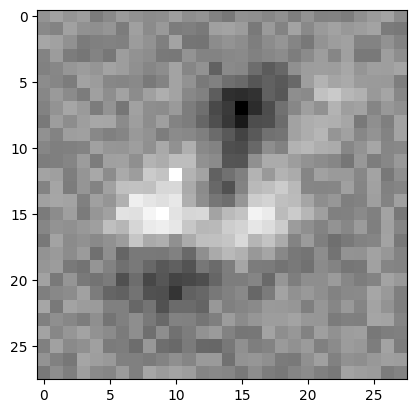

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  18 ;Perda:  tensor(0.5716, grad_fn=<NllLossBackward0>) ;Acurácia:  0.875


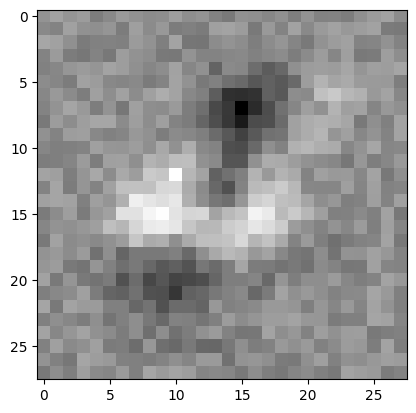

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  19 ;Perda:  tensor(0.5578, grad_fn=<NllLossBackward0>) ;Acurácia:  0.879


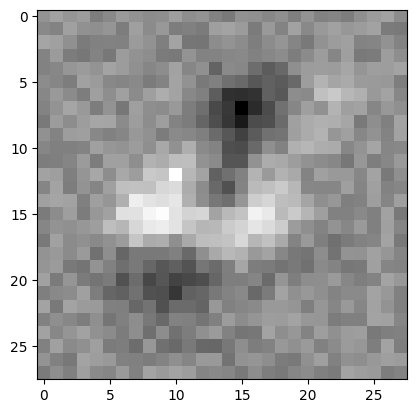

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  20 ;Perda:  tensor(0.5451, grad_fn=<NllLossBackward0>) ;Acurácia:  0.88


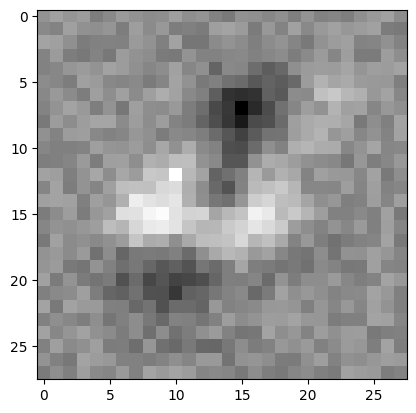

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  21 ;Perda:  tensor(0.5334, grad_fn=<NllLossBackward0>) ;Acurácia:  0.88


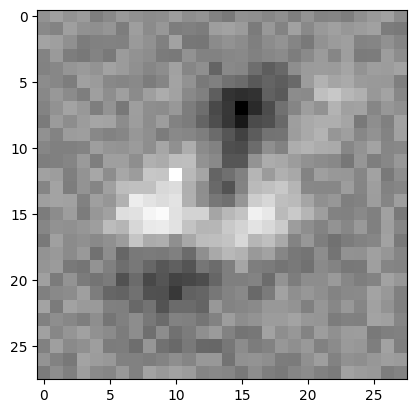

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  22 ;Perda:  tensor(0.5226, grad_fn=<NllLossBackward0>) ;Acurácia:  0.882


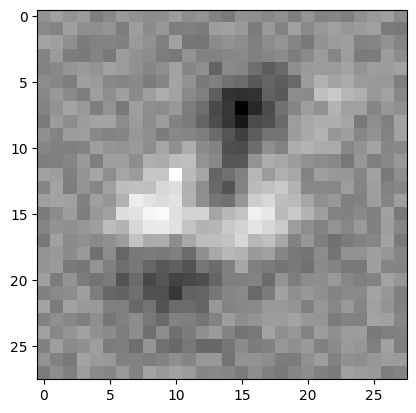

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  23 ;Perda:  tensor(0.5124, grad_fn=<NllLossBackward0>) ;Acurácia:  0.884


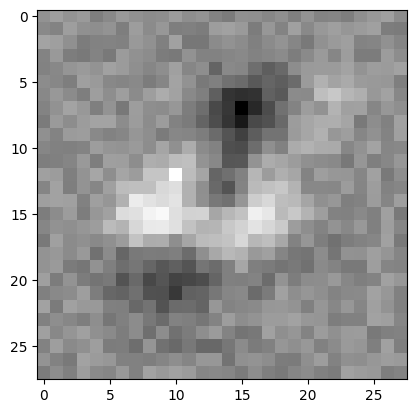

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  24 ;Perda:  tensor(0.5030, grad_fn=<NllLossBackward0>) ;Acurácia:  0.887


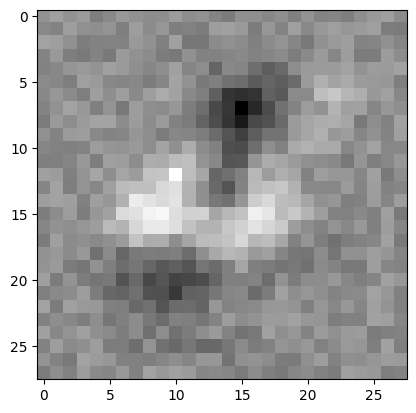

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Época:  25 ;Perda:  tensor(0.4941, grad_fn=<NllLossBackward0>) ;Acurácia:  0.89


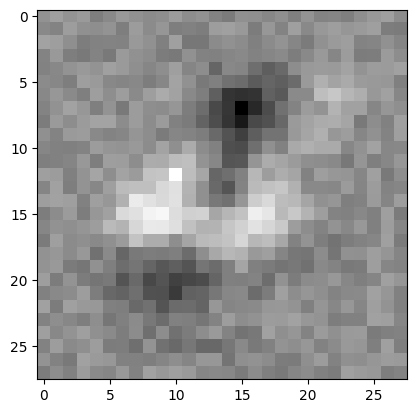

In [108]:
#R2 Visualizar a evolução do dígito 4. Aumentei a epoch para que a visualização da evolução ficasse mais evidente.

losses = []
zs = []
contador = 0


try:
    for i in range(epochs):

        contador = contador + 1

        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # Predict da rede
        outputs = model(inputs)
        zs.append(outputs[1].detach().numpy())

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data)
        _, predicts = torch.max(outputs, 1)

        y_pred = predicts.data
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()

        weights = model.state_dict()['weight']
        print('weights:', weights.shape)

        bias = model.state_dict()['bias']
        print('bias:   ', bias.shape)

        print('Época: ',contador,';Perda: ',loss,';Acurácia: ',accuracy)

        # Visualizando pesos da classe 4
        plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
        plt.show()

except KeyboardInterrupt:
    pass


<details>
<summary>Mostrar Resultado</summary>

```python
from IPython import display
import numpy
a = 5
losses = []
zs = []
fig = plt.figure(figsize=(18, 6))

try:
    for i in range(epochs):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # Predict da rede
        outputs = model(inputs)
        zs.append(outputs[1].detach().numpy())

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data)
        weights_d = model.weight.data[4].numpy().reshape(28,28)
        weights_g = model.weight.grad.data[4].numpy().reshape(28,28)
        ww = np.concatenate((weights_d,weights_g),1)
        plt.imshow(ww.reshape((28,28*2)),cmap = 'gray')
        display.display(fig)
        display.clear_output(wait=True)
        input(i)
        
        _, predicts = torch.max(outputs, 1)

        y_pred = predicts.data
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()
        print('Accuracy:', accuracy)
        print("epoca: " + str(i + 1))
        print("perda: " + str(loss.data.detach().numpy()))
except KeyboardInterrupt:
    pass
```

</details>



## Perguntas

1. Qual é o shape da matriz de entrada na rede?

    R= 1000, 28, 28 entrada


2. Qual é o shape da saída da rede?

    R= 1000, 10 Saídas

3. Qual é o número total de parâmetros da rede, incluindo o bias?

    R= 20x20x10 + 10 = 7850

# Aprendizados
